# Exploratory Data Analysis (EDA)

## 1. Dataset Overview
- Dataset shape and columns
- Data types and preview

In [107]:
# import libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from wordcloud import WordCloud
from bidi.algorithm import get_display

In [83]:
# read dataframe
news_df = pd.read_csv("../data/raw/merged_cleaned.csv")

In [84]:
# print first 5 rows
news_df.head()

,Id,date,platform,title,News content,Label
0,1,2023-01-11 00:00:00,Aljazeera,الضفة الغربية.. الاحتلال يهدم 17 منزلا تاريخيا...,هدمت قوات الاحتلال الإسرائيلي -اليوم الأربعاء-...,real
1,2,2023-01-11 00:00:00,Aljazeera,مظاهرات بمدن أوروبية تضامنا مع غزة وحشود أمام ...,خرجت مظاهرات في عدد من المدن الأوروبية مساء ال...,real
2,3,2023-01-11 00:00:00,Aljazeera,شهداء في جنين وطولكرم وإضراب عام بالضفة الغربي...,استشهد 4 فلسطينيين واعتقل عشرات آخرون -اليوم ا...,real
3,4,2023-02-11 00:00:00,Aljazeera,أبو عبيدة: خسائر العدو أكبر بكثير مما يعلن وسن...,أكد الناطق باسمكتائب الشهيد عز الدين القسام-ال...,real
4,5,2023-03-11 00:00:00,Aljazeera,9 شهداء بالضفة والاحتلال يشن حملة اعتقالات,استشهد 9 فلسطينيين في مواجهات اندلعت مع قوات ا...,real


In [85]:
# print last 5 rows
news_df.tail()

,Id,date,platform,title,News content,Label
5347,5348,2025-05-30 00:00:00,Aljazeera,"الحرب على غزة مباشر.. مجازر إسرائيلية بمراكز ""...",في اليوم الـ77 من استئناف حرب الإبادة على غزة،...,real
5348,5349,2025-05-30 00:00:00,Misbar,الصورة ليست لجندي مغربي سقط في كمين للمقاومة ا...,تتداول حسابات على موقع التواصل الاجتماعي إكس، ...,fake
5349,5350,2025-05-30 00:00:00,Aljazeera,مظاهرات بإسرائيل تطالب بإكمال الصفقة وجدل حول ...,تظاهر محتجون وسط تل أبيب ليل الاثنين وأضرموا ا...,real
5350,5351,2025-05-30 00:00:00,Aljazeera,"زكريا الزبيدي حرا.. ""التنين"" الفلسطيني الذي هز...",لم يكن في مخيلة وزير الأمن القومي الإسرائيلي ا...,real
5351,5352,2025-05-30 00:00:00,Misbar,فيديو قديم لمعتمر يدعو لغزة خلال طوافه في الحر...,تتداول حسابات وصفحات على مواقع التواصل الاجتما...,fake


In [86]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            5352 non-null   int64 
 1   date          5352 non-null   object
 2   platform      5352 non-null   object
 3   title         5352 non-null   object
 4   News content  5352 non-null   object
 5   Label         5352 non-null   object
dtypes: int64(1), object(5)
memory usage: 251.0+ KB


We need to change "date" column datatype, change "News content" name to "description", and lowercase "Label" to improve readability

In [87]:
# rename columns
news_df.rename(columns={
    'Id': 'id',
    'News content': 'content',
    'Label': 'label'
}, inplace=True)

In [88]:
# convert date column
news_df['date'] = pd.to_datetime(news_df['date'])

In [89]:
# statistics summary
news_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,5352.0,2676.5,1.0,1338.75,2676.5,4014.25,5352.0,1545.133651
date,5352,2024-07-08 18:42:08.402466560,2011-03-20 00:00:00,2024-01-03 00:00:00,2024-08-04 17:34:00,2024-11-25 00:00:00,2025-06-23 00:00:00,NaN


## 2. Missing and Duplicate Values
- Null values per column
- Duplicate row count



In [90]:
# check for null values
news_df.isnull().sum()

id          0
date        0
platform    0
title       0
content     0
label       0
dtype: int64

In [91]:
# check for duplicates
def check_duplicate(col):
    duplicate_count = news_df[col].duplicated().sum()
    return f"{col}: Duplicated entries = {duplicate_count}"

cols_dp = [check_duplicate(col) for col in news_df[["title", "content"]]]
cols_dp

['title: Duplicated entries = 301', 'content: Duplicated entries = 23']

As shown, there is 301 duplicated entries in "title" field, and 23 in "News content" field

In [92]:
# drop duplicated entries
news_df = news_df.drop_duplicates(subset=['content'])
news_df = news_df.drop_duplicates(subset=['title'])

## 3. Label Distribution
- Count plot of `real` vs `fake`
- Class imbalance percentage

C:\Users\Walid\AppData\Local\Temp\ipykernel_14448\2499026956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news_df, x='label', palette='viridis')


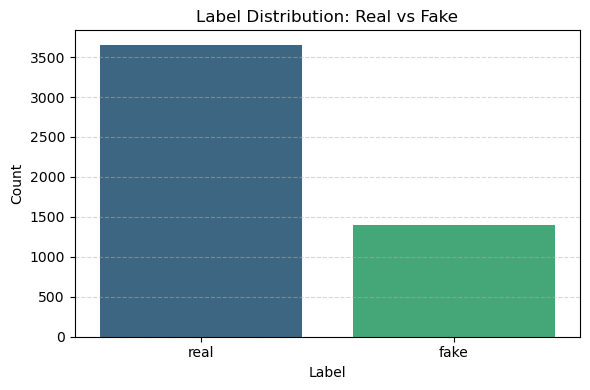

In [93]:
# count plot of real vs fake
plt.figure(figsize=(6, 4))
sns.countplot(data=news_df, x='label', palette='viridis')

plt.title("Label Distribution: Real vs Fake")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [94]:
# Class imbalance percentage
label_counts = news_df['label'].value_counts()
total = label_counts.sum()

for label, count in label_counts.items():
    percentage = (count / total) * 100
    print(f"{label}: {count} articles ({percentage:.2f}%)")


real: 3652 articles (72.30%)
fake: 1399 articles (27.70%)


There is a mild degree of imbalance, as majority class (real) represents 72.3% of the dataset and minority class (fake) represents 27.7%

## 4. Platform Analysis
- Top sources/platforms
- Rare values grouping strategy

C:\Users\Walid\AppData\Local\Temp\ipykernel_14448\1861808926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.values, y=top_platforms.index, palette="viridis")


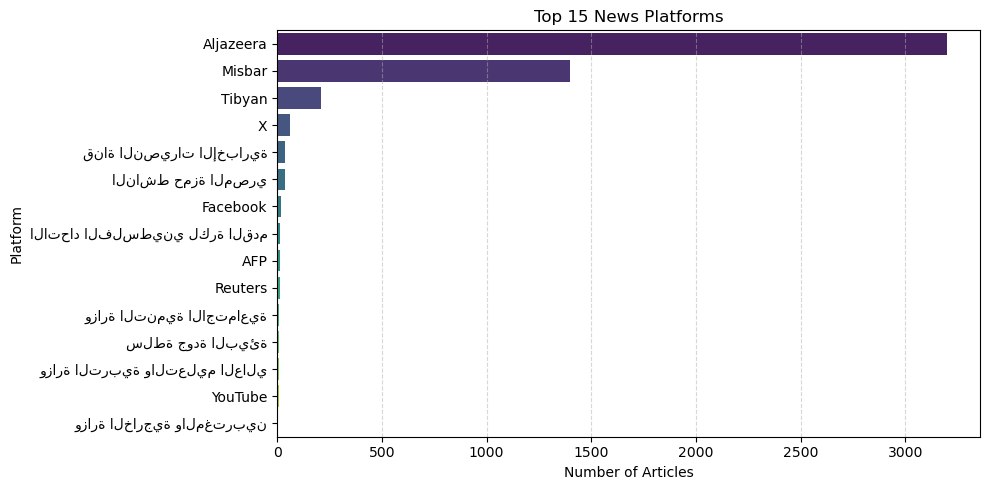

In [95]:
# top platforms by frequency
plt.figure(figsize=(10, 5))
top_platforms = news_df['platform'].value_counts().head(15)

sns.barplot(x=top_platforms.values, y=top_platforms.index, palette="viridis")
plt.title("Top 15 News Platforms")
plt.xlabel("Number of Articles")
plt.ylabel("Platform")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Walid\AppData\Local\Temp\ipykernel_14448\1928928094.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news_df, y='platform_grouped', order=news_df['platform_grouped'].value_counts().index, palette="viridis")


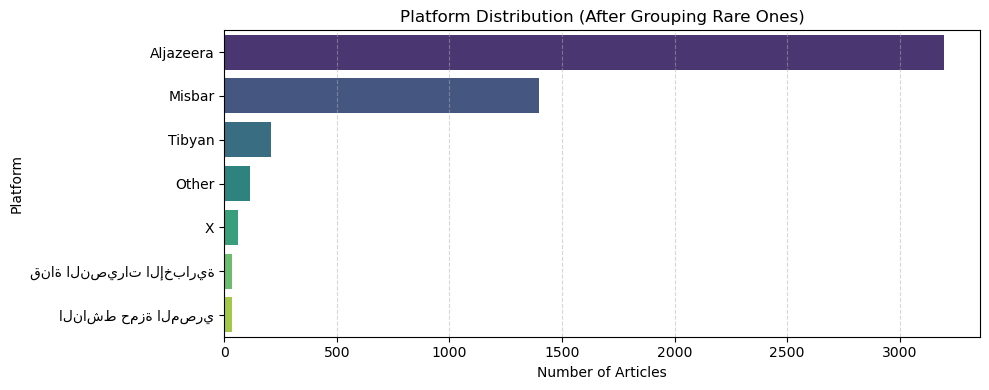

In [97]:
# Count platform occurrences
platform_counts = news_df['platform'].value_counts()

# Set a threshold (e.g., keep only platforms with >= 10 entries)
threshold = 30

# Create a new column grouping rare platforms as "Other"
news_df['platform_grouped'] = news_df['platform'].apply(
    lambda x: x if platform_counts[x] >= threshold else 'Other'
)

# Visualize new distribution after grouping
plt.figure(figsize=(10, 4))
sns.countplot(data=news_df, y='platform_grouped', order=news_df['platform_grouped'].value_counts().index, palette="viridis")

plt.title("Platform Distribution (After Grouping Rare Ones)")
plt.xlabel("Number of Articles")
plt.ylabel("Platform")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

To reduce the effect of long-tail platforms that appear fewer than 30 times, we grouped them under the label "Other"

## 5. Text Length Analysis
- Length of titles and content
- Histogram plots

In [ ]:
# Add new columns for word count
news_df['title_length'] = news_df['title'].apply(lambda x: len(str(x).split()))
news_df['content_length'] = news_df['content'].apply(lambda x: len(str(x).split()))

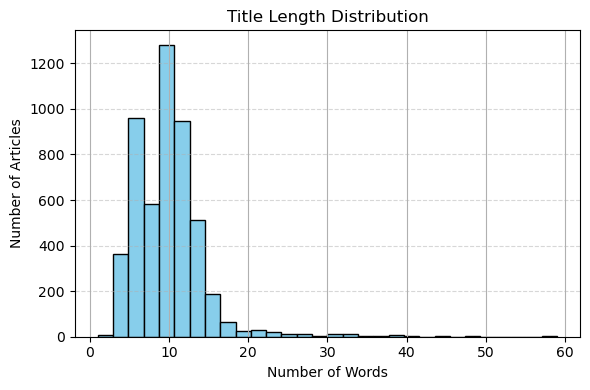

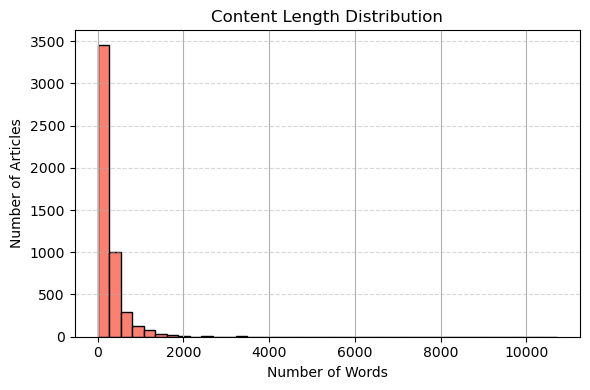

In [99]:
# Histogram for title length
plt.figure(figsize=(6, 4))
news_df['title_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Title Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histogram for content length
plt.figure(figsize=(6, 4))
news_df['content_length'].hist(bins=40, color='salmon', edgecolor='black')
plt.title("Content Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Walid\AppData\Local\Temp\ipykernel_14448\286636316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=news_df, x='label', y='content_length', palette="Set2")


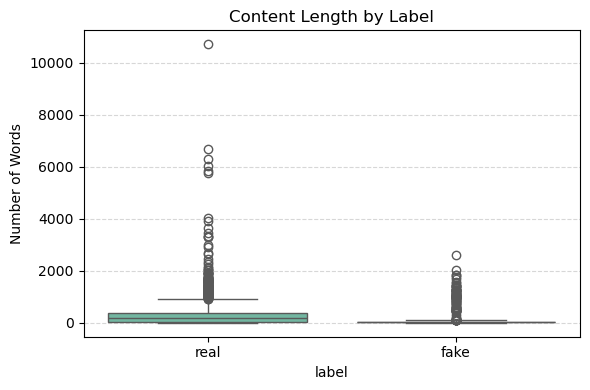

In [100]:
# compare Real vs Fake text lengths
plt.figure(figsize=(6, 4))
sns.boxplot(data=news_df, x='label', y='content_length', palette="Set2")
plt.title("Content Length by Label")
plt.ylabel("Number of Words")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 6. Word Cloud
- Visual comparison between real and fake

In [105]:
# function to reshape and reorder Arabic words
def prepare_arabic_text(text):
    # Remove unsupported characters (LRI, RLI, PDI, etc.)
    text = re.sub(r'[\u2066\u2067\u2068\u2069]', '', text)
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # Keep Arabic chars only
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

In [ ]:
# combine content per label
real_text_raw = " ".join(news_df[news_df['label'] == 'real']['content'].astype(str))
fake_text_raw = " ".join(news_df[news_df['label'] == 'fake']['content'].astype(str))

# prepare for rendering
real_text = prepare_arabic_text(real_text_raw)
fake_text = prepare_arabic_text(fake_text_raw)

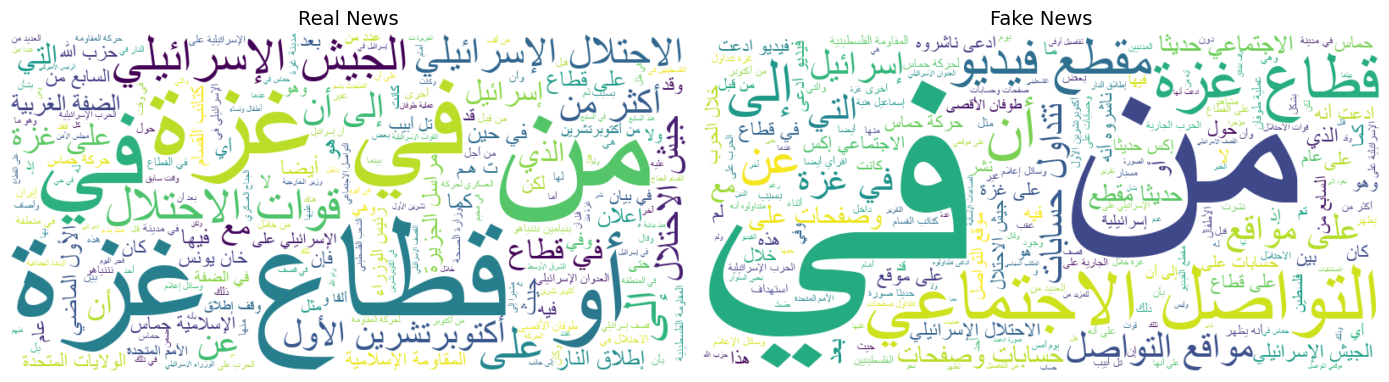

In [109]:
# generate word cloud
plt.figure(figsize=(14, 6))

# Real News
plt.subplot(1, 2, 1)
wordcloud_real = WordCloud(font_path='arial', width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News", fontsize=14)

# Fake News
plt.subplot(1, 2, 2)
wordcloud_fake = WordCloud(font_path='arial', width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News", fontsize=14)

plt.tight_layout()
plt.show()

Note: I stopped here, we still new to enhance wordcloud, and add plots with dates

## 7. Summary of Insights
- Key findings from above steps
- Cleaning decisions to apply next